In [2]:
# AI for Good COVID-19 Simulator
# Module: Model Validation
# Last updated: 10/5/2020

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pd.set_option("display.max_rows", None, "display.max_columns", None)
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
model_output = "CM_output_sample1.csv"
age_categories = pd.read_csv("age_categories.csv")['age'].to_list()
case_cols = pd.read_csv("cm_output_columns.csv")['columns'].to_list()
df_cm = pd.read_csv(model_output)

# population of the camp
population = 18700

In [4]:
df = df_cm["Time"]
# num of days
n_days = df.nunique()
n_rows = df.shape[0]
# num of simuls
n_simul = df[df == 0].count()

print("Processing CM output for model validation:" + model_output)
print("num of days = ", n_days)
print("num of simulations= ", n_simul)

Processing CM output for model validation:CM_output_sample1.csv
num of days =  201
num of simulations=  10


In [5]:
# Get df for population
# Use this as the benchmark for the age group
cols_overall = ["Time"] + case_cols
df_all_simul = df_cm[cols_overall]
df_all_sum = df_all_simul.groupby(['Time']).sum() * population
df_all = df_all_sum / n_simul
df_all_mean = df_all.mean()
df_all_std = df_all.std()

In [6]:
# no. of subplots
Tot = len(age_categories)
# no. of columns
Cols = 4
# no. of rows
Rows = Tot // Cols
Rows += Tot % Cols

col Exposed age 0-9
col Exposed age 10-19
col Exposed age 20-29
col Exposed age 30-39
col Exposed age 40-49
col Exposed age 50-59
col Exposed age 60-69
col Exposed age 70+
col Infected (symptomatic) age 0-9
col Infected (symptomatic) age 10-19
col Infected (symptomatic) age 20-29
col Infected (symptomatic) age 30-39
col Infected (symptomatic) age 40-49
col Infected (symptomatic) age 50-59
col Infected (symptomatic) age 60-69
col Infected (symptomatic) age 70+
col Asymptomatically Infected age 0-9
col Asymptomatically Infected age 10-19
col Asymptomatically Infected age 20-29
col Asymptomatically Infected age 30-39
col Asymptomatically Infected age 40-49
col Asymptomatically Infected age 50-59
col Asymptomatically Infected age 60-69
col Asymptomatically Infected age 70+
col Recovered age 0-9
col Recovered age 10-19
col Recovered age 20-29
col Recovered age 30-39
col Recovered age 40-49
col Recovered age 50-59
col Recovered age 60-69
col Recovered age 70+
col Hospitalised age 0-9
col Hos

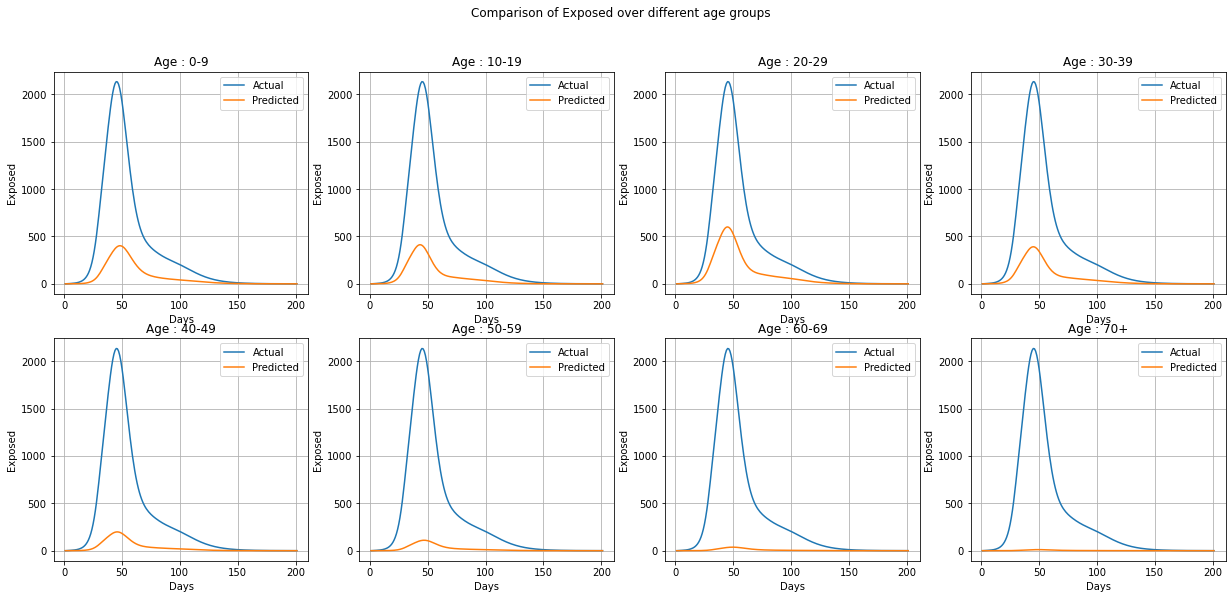

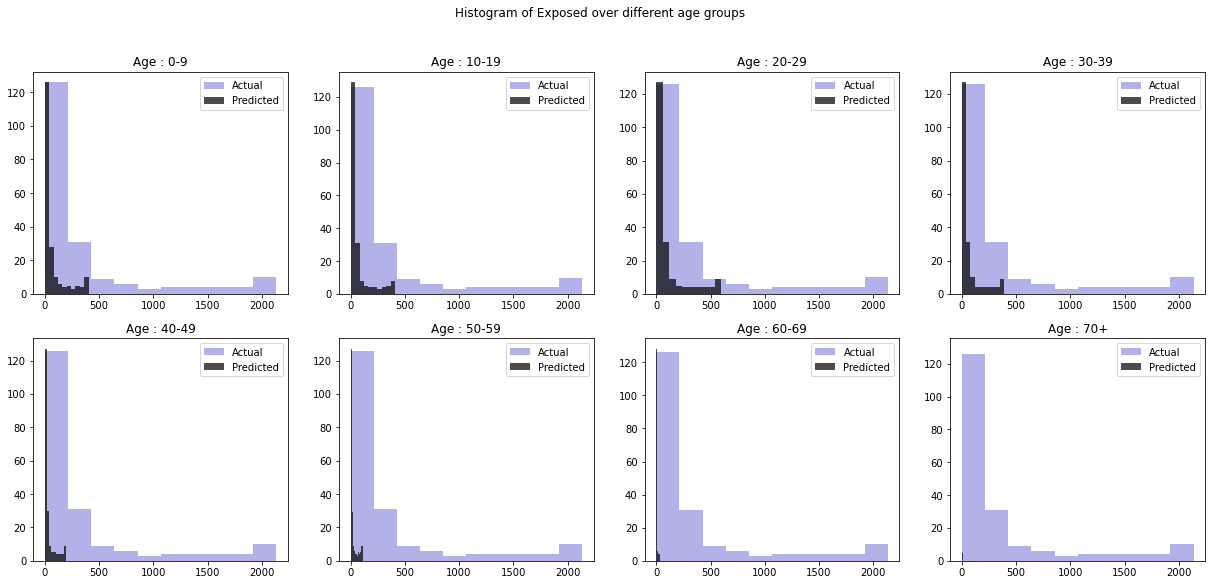

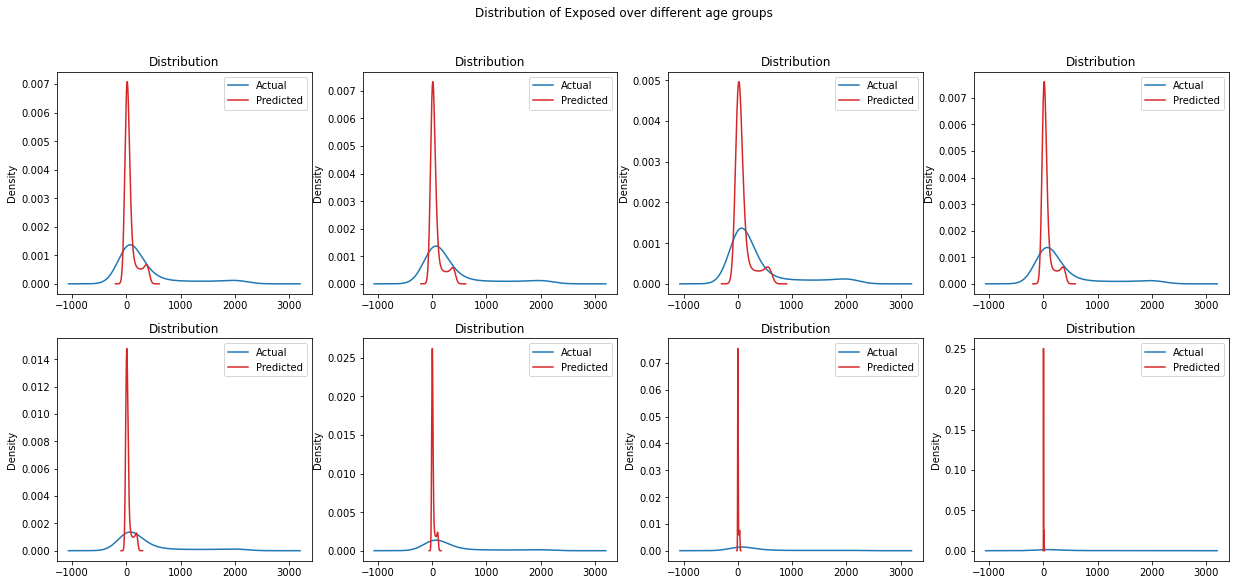

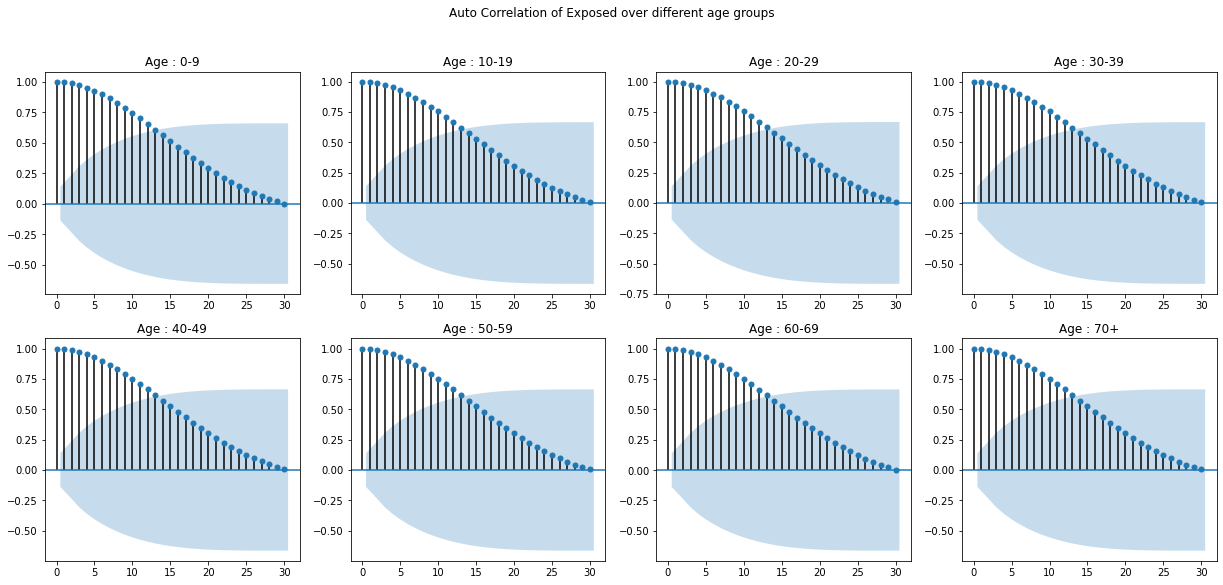

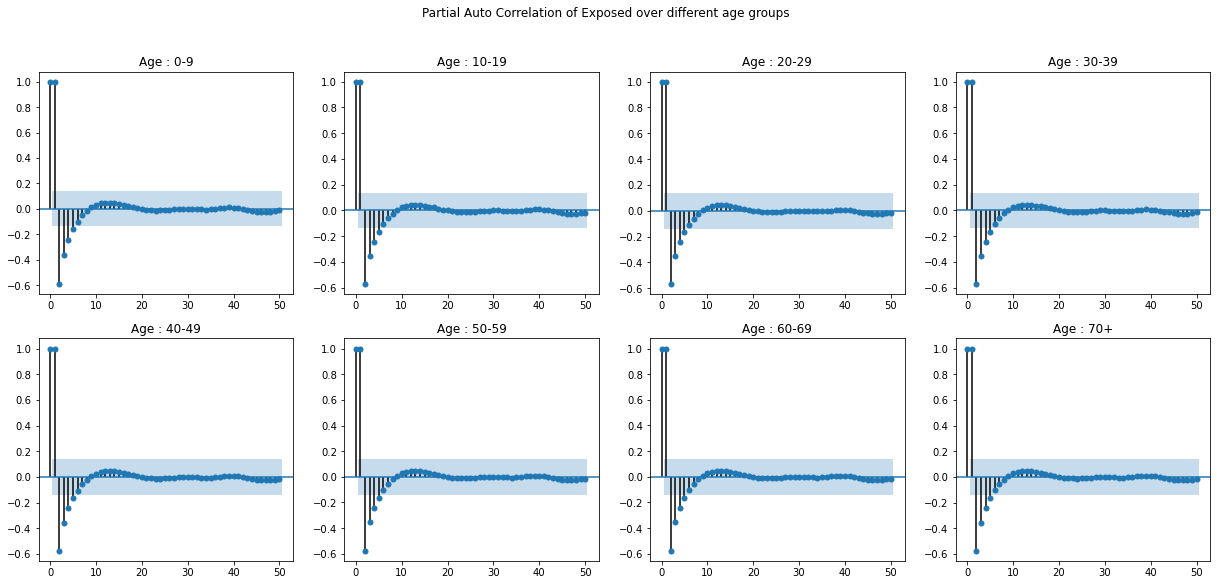

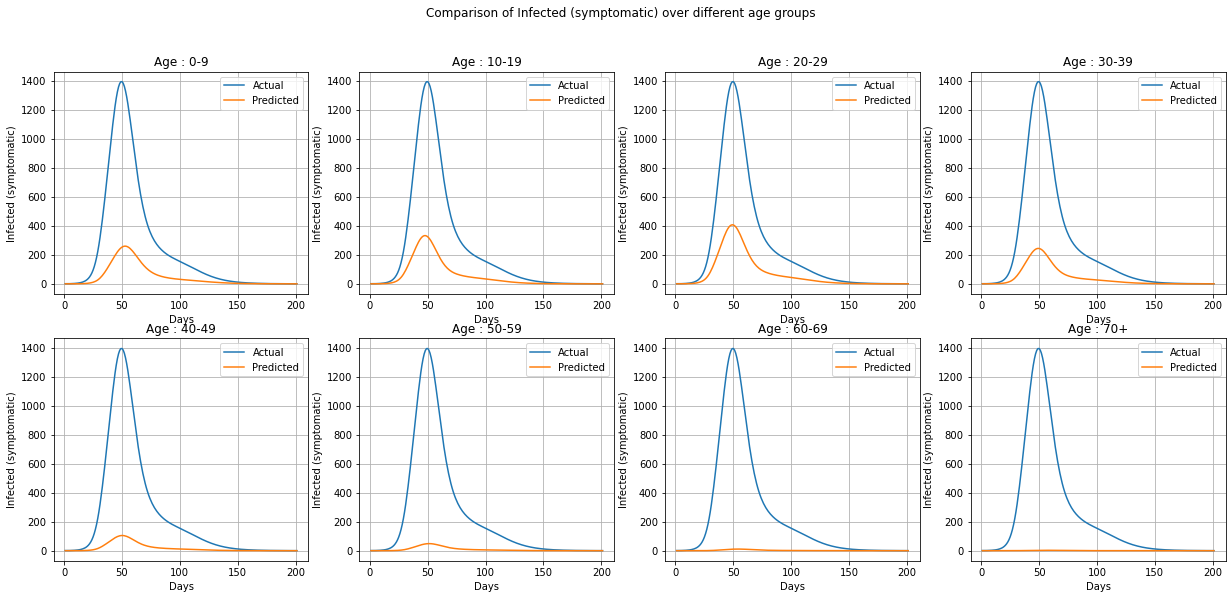

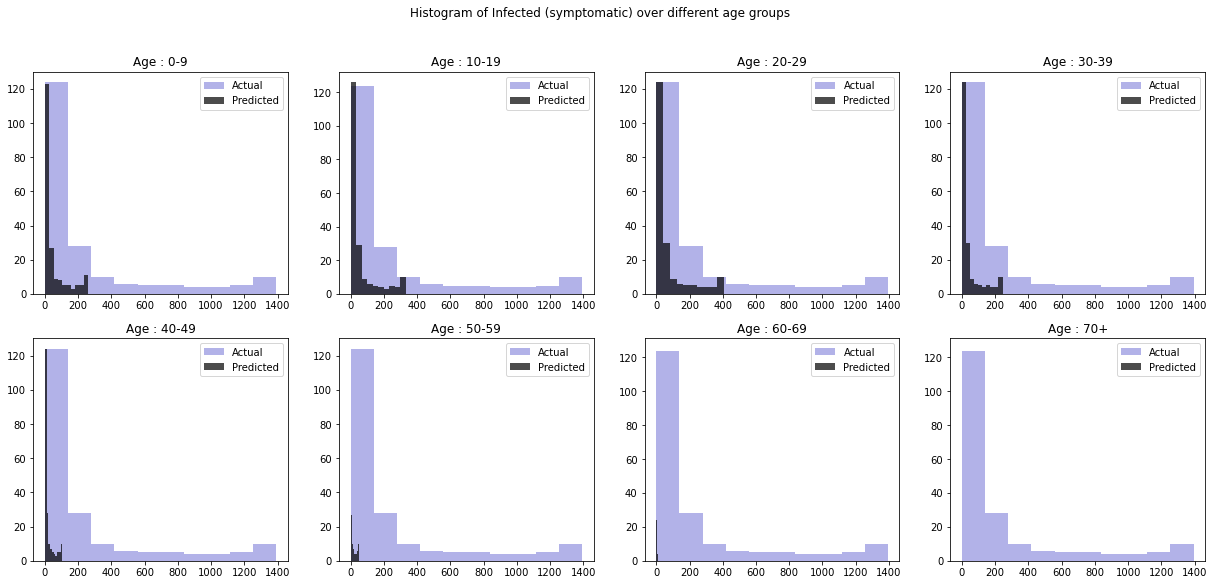

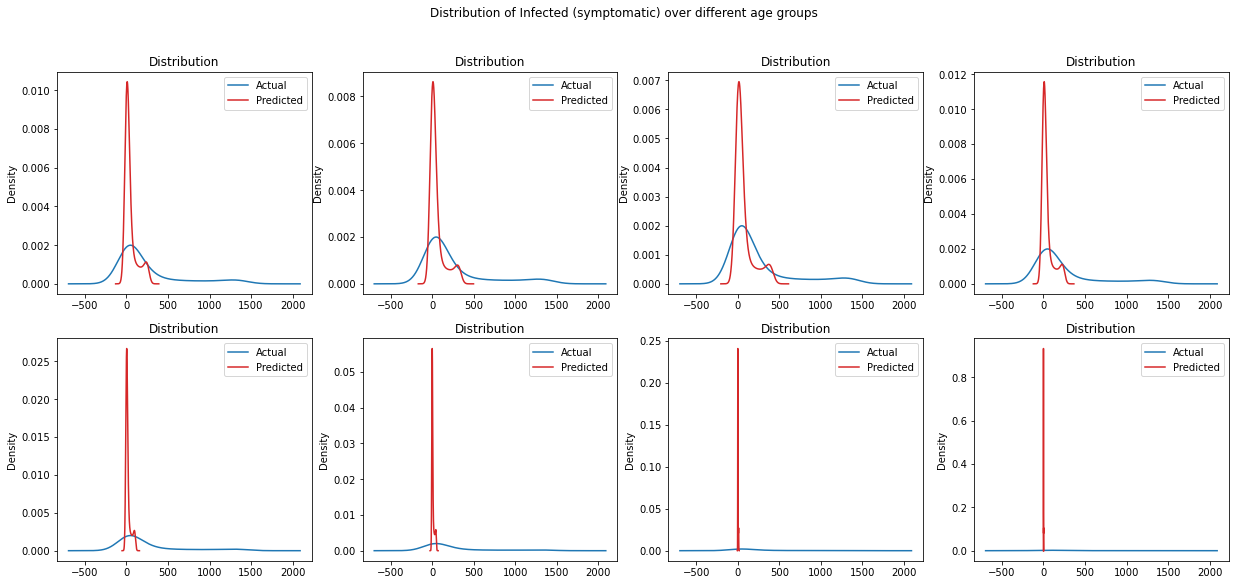

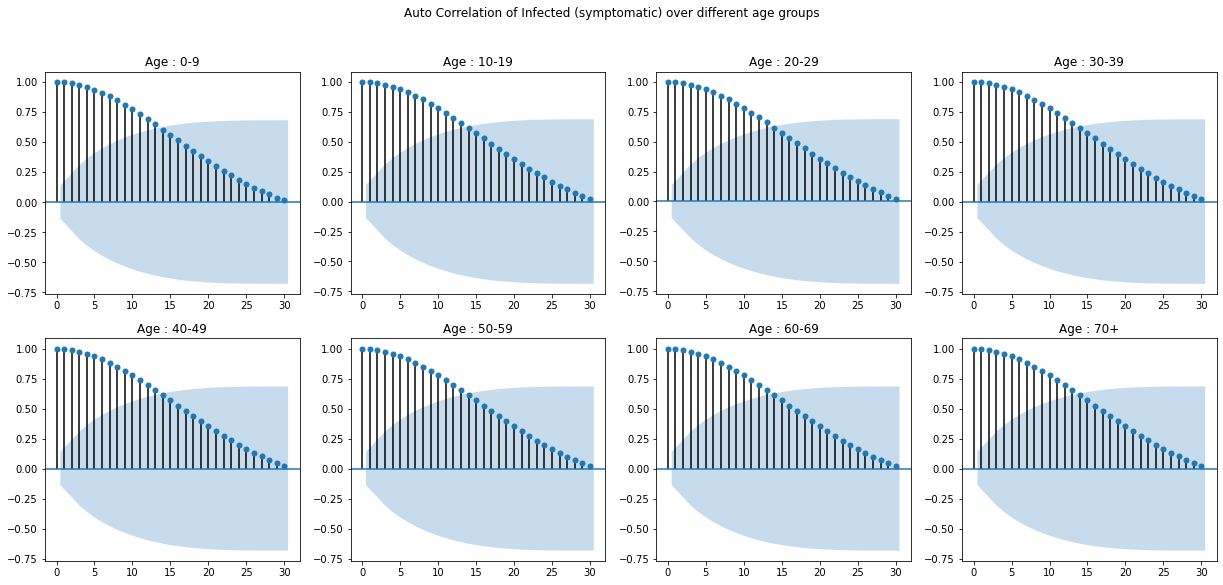

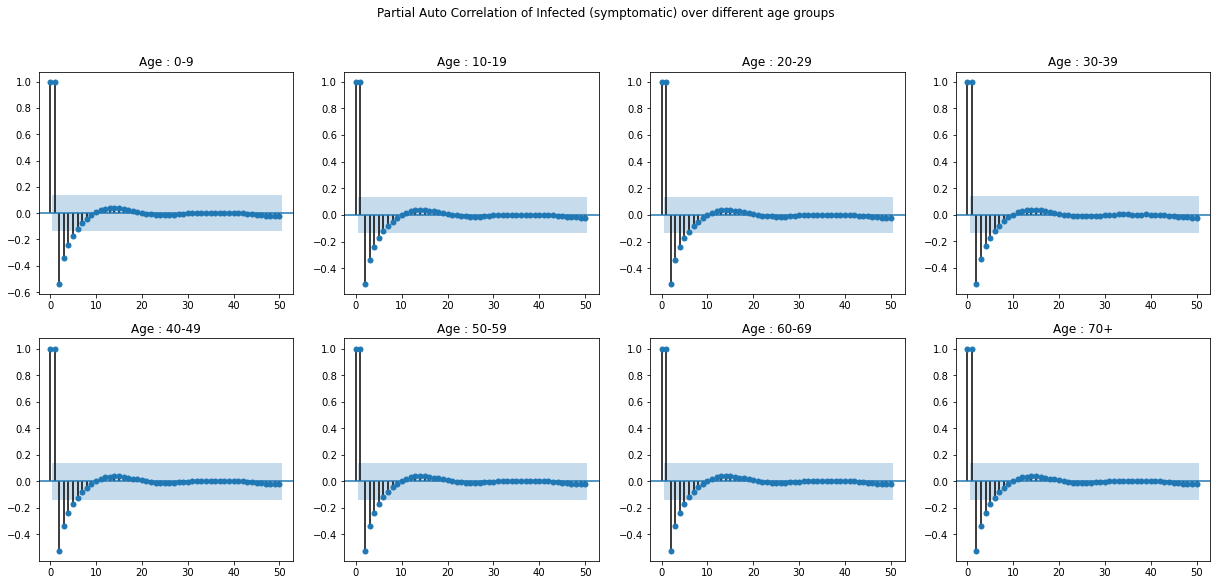

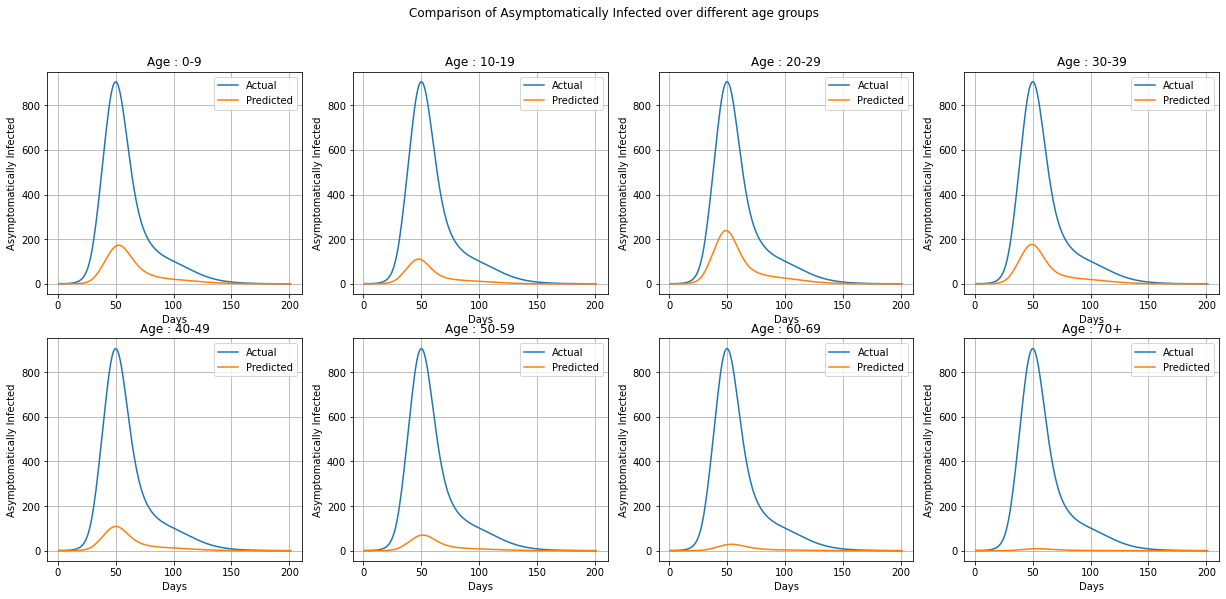

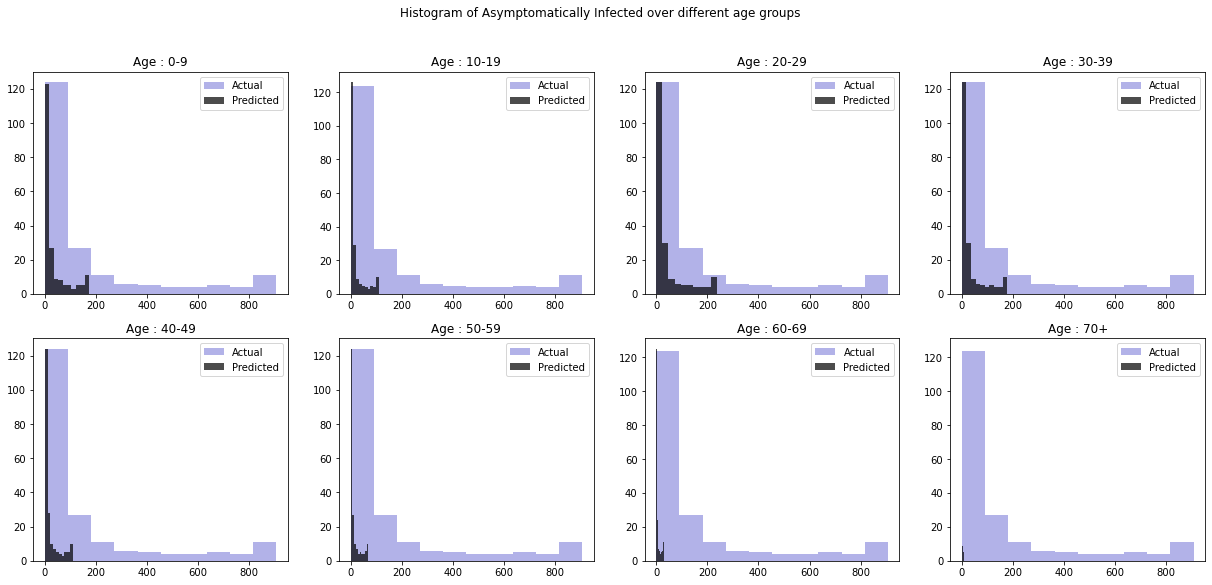

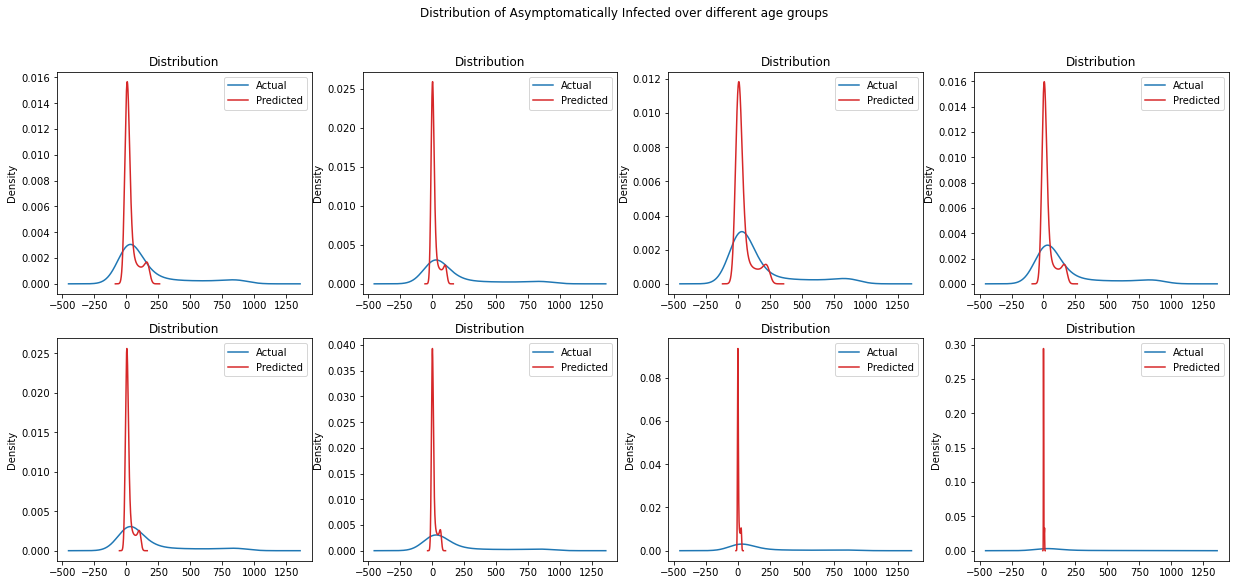

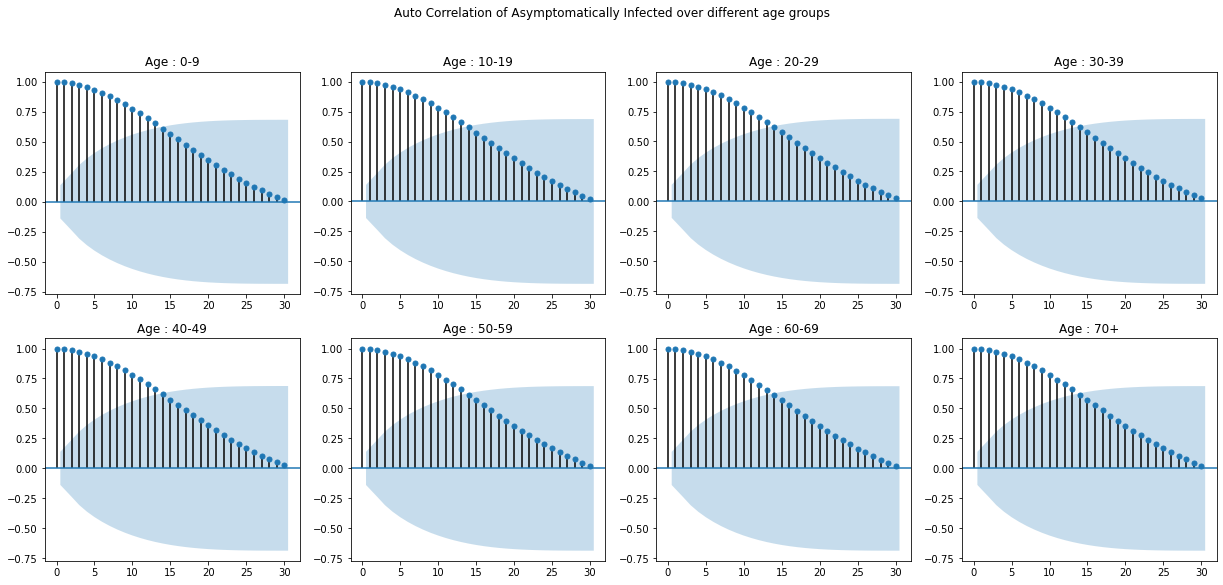

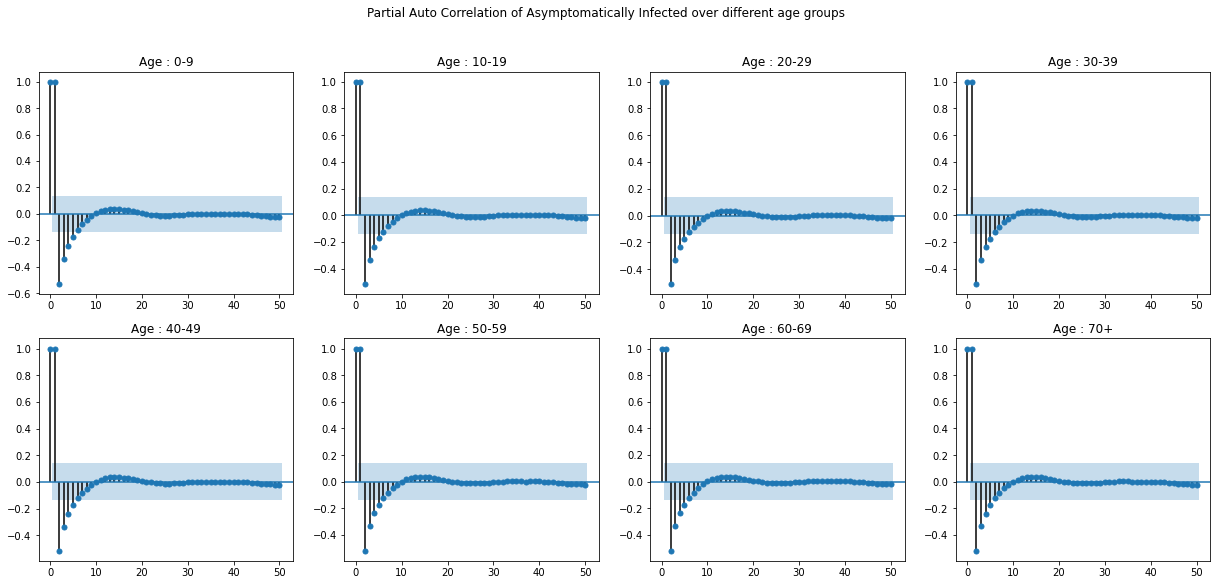

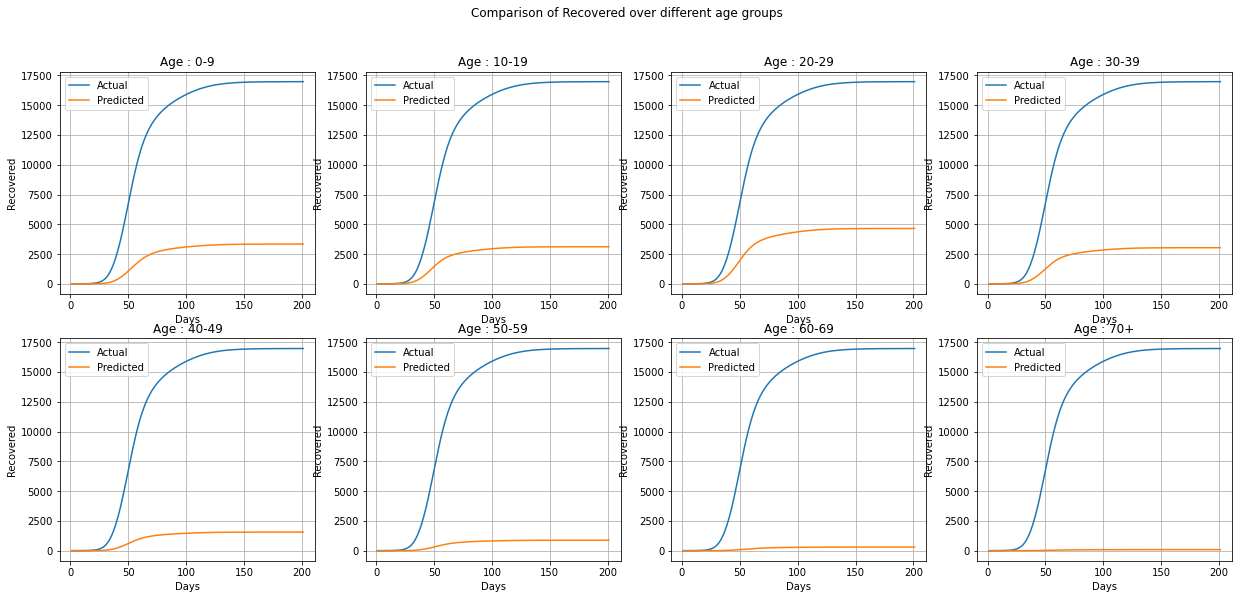

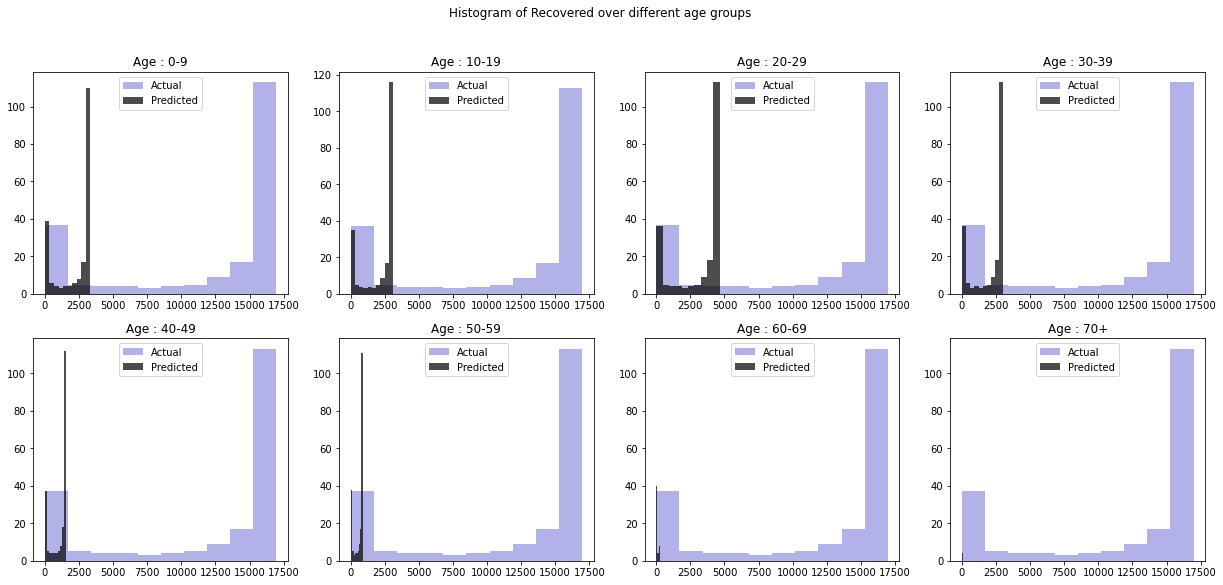

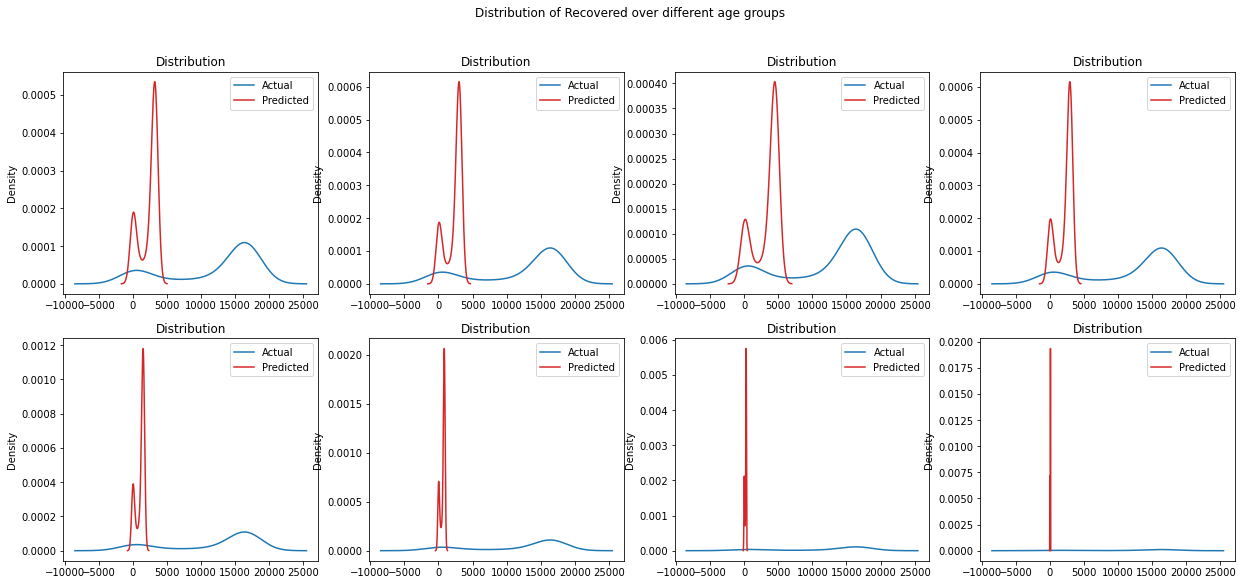

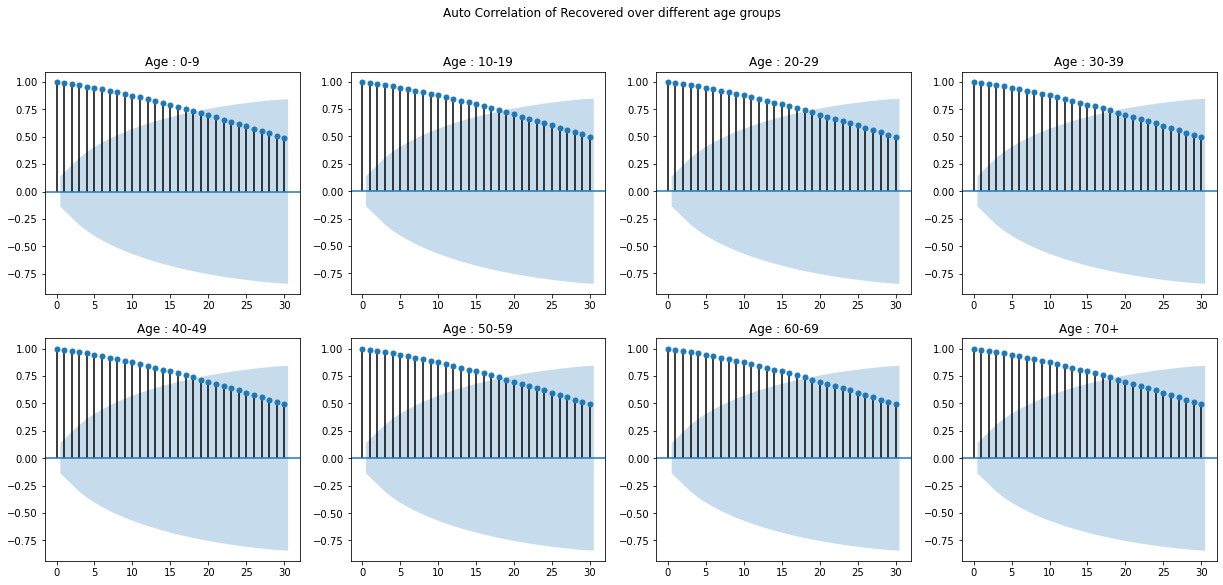

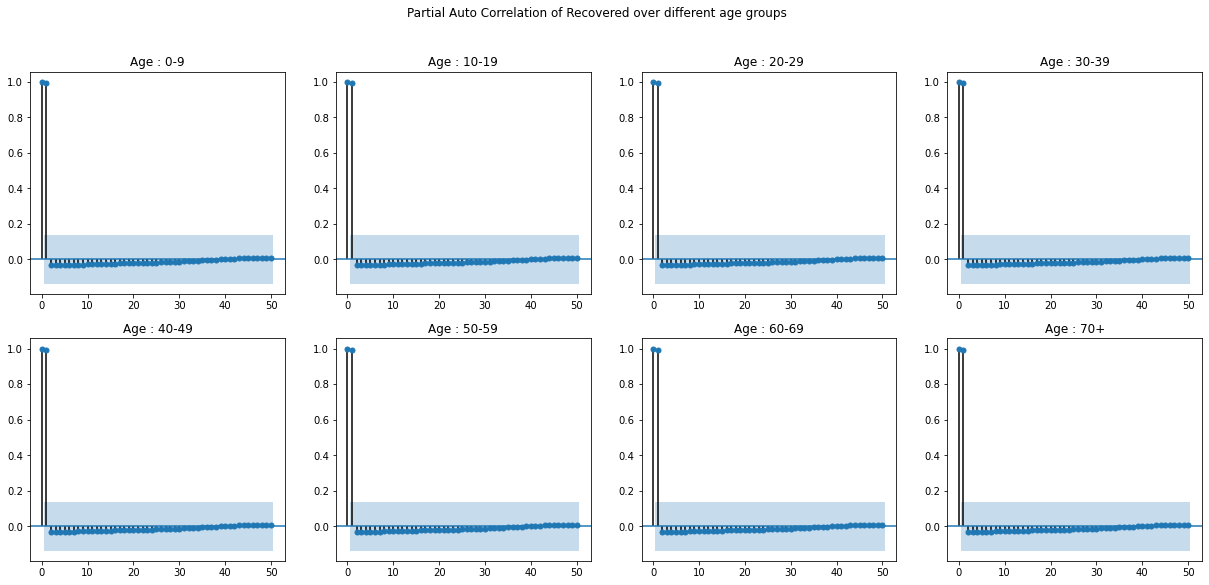

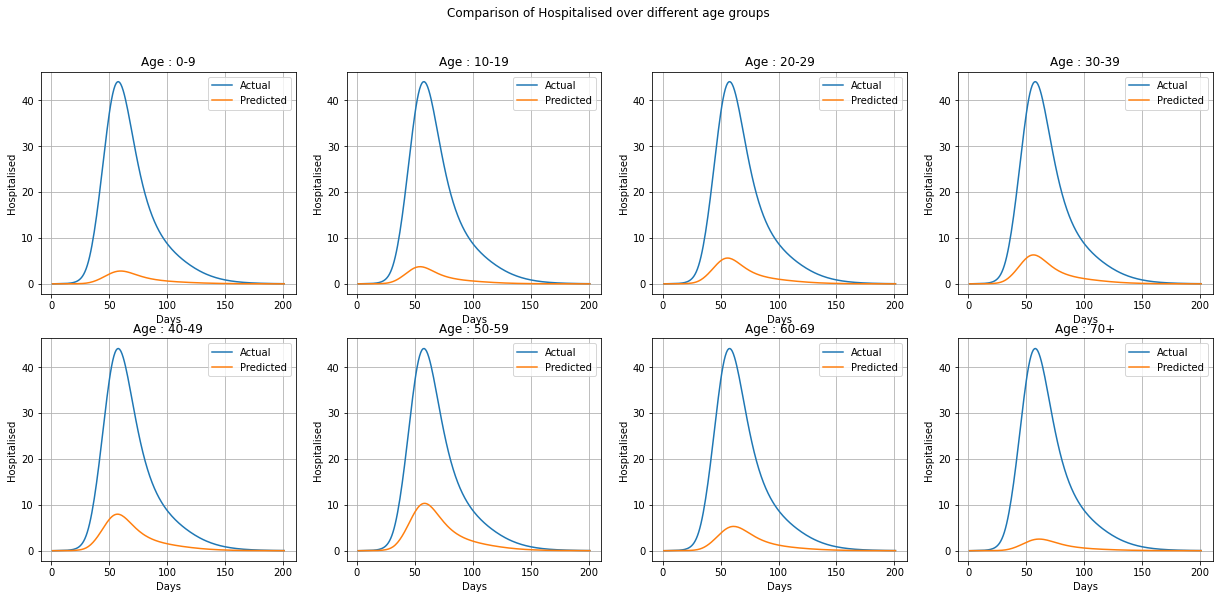

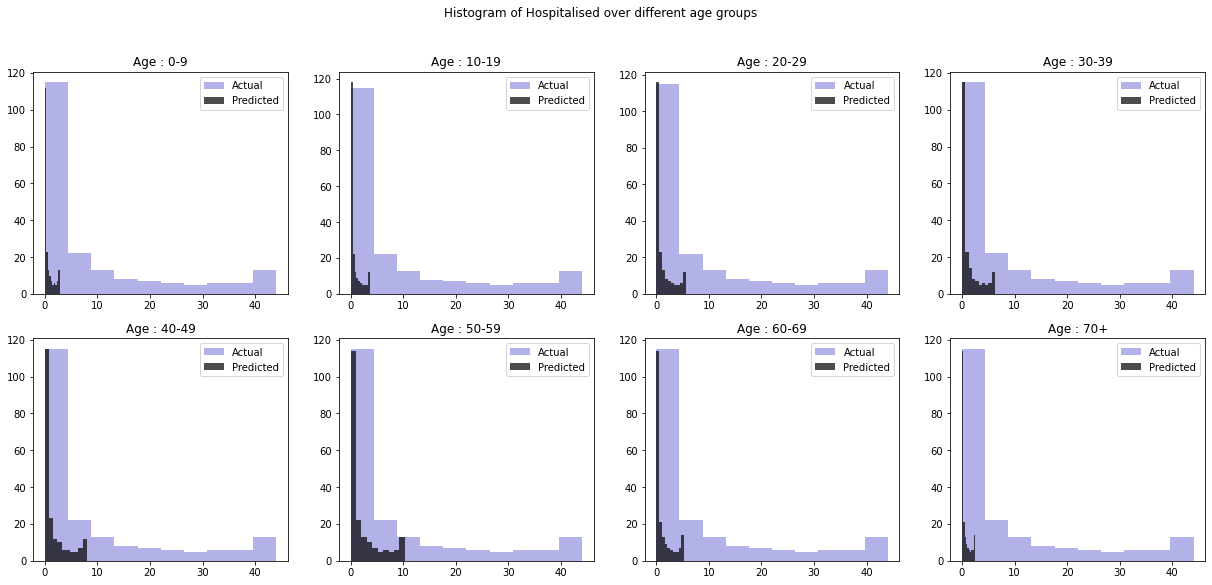

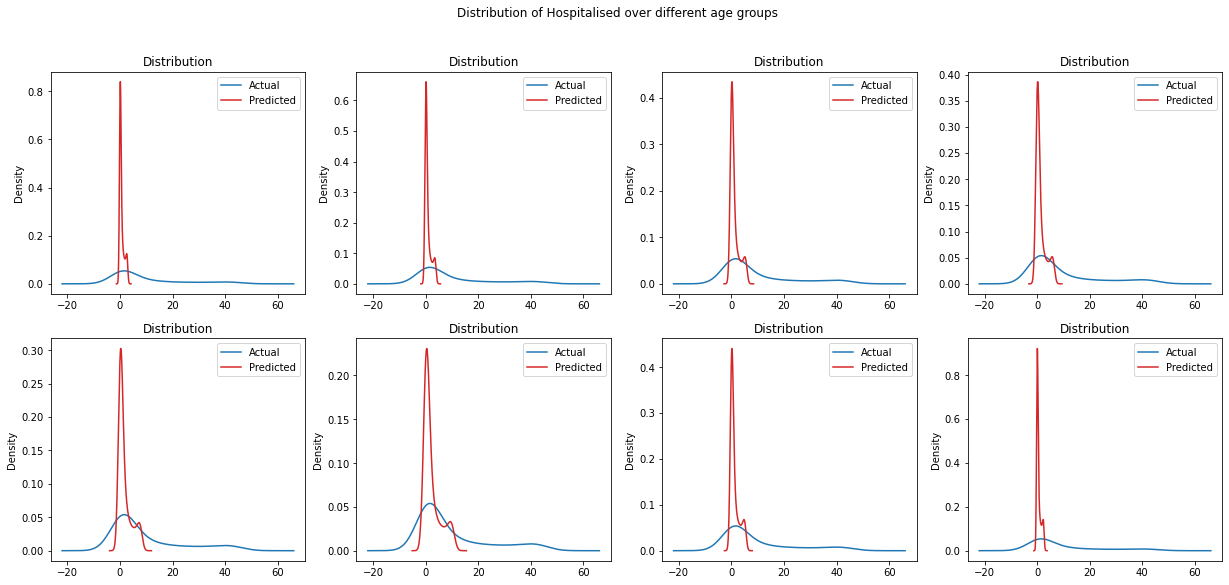

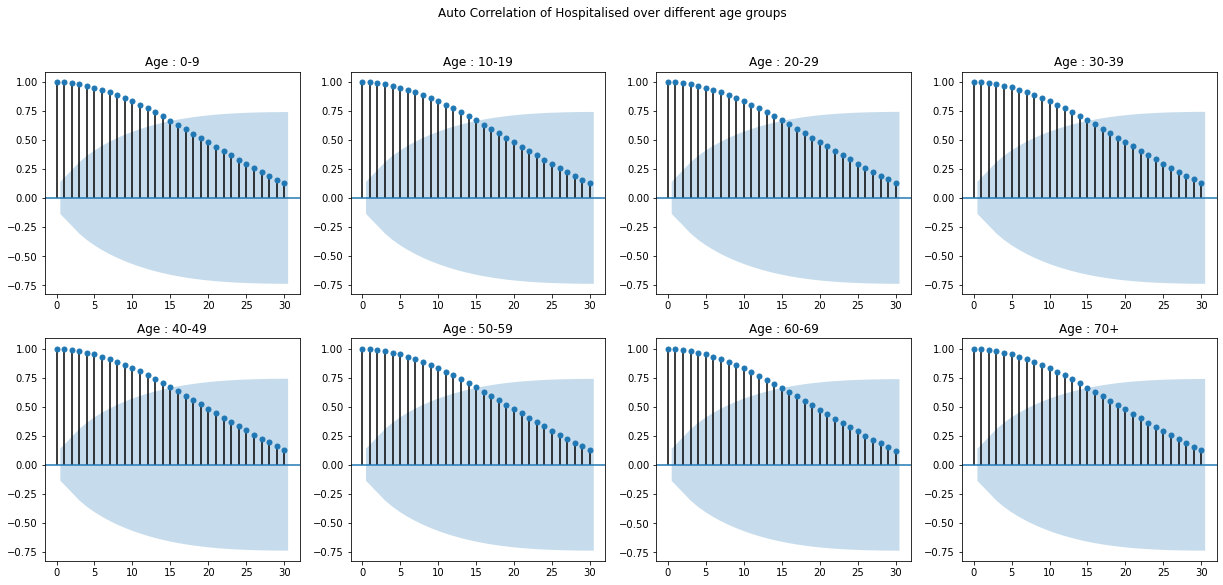

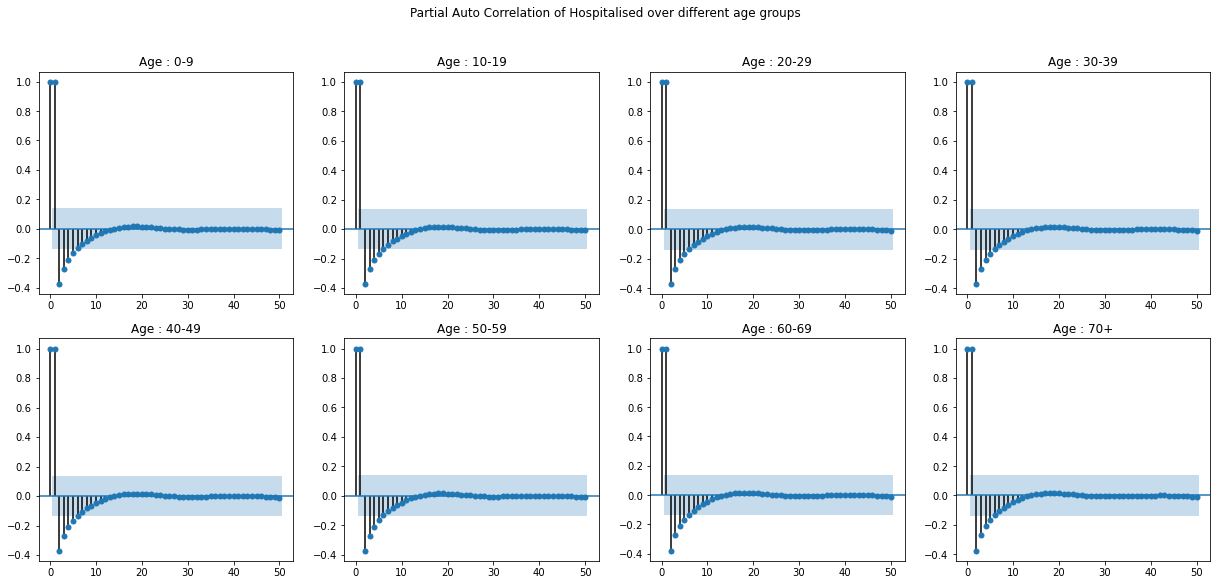

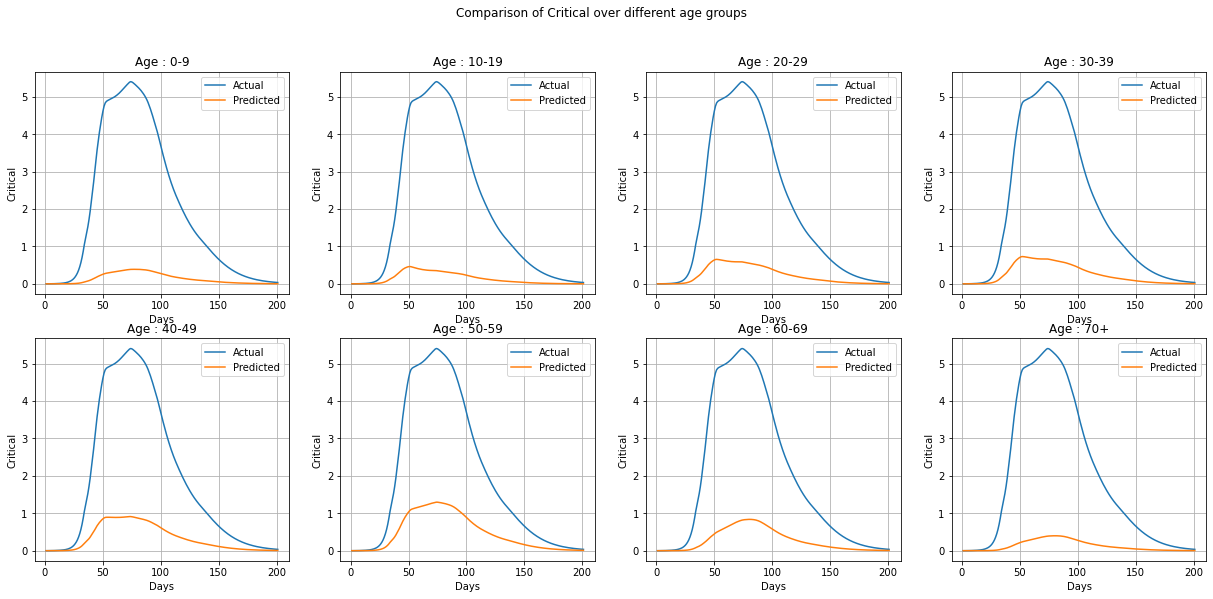

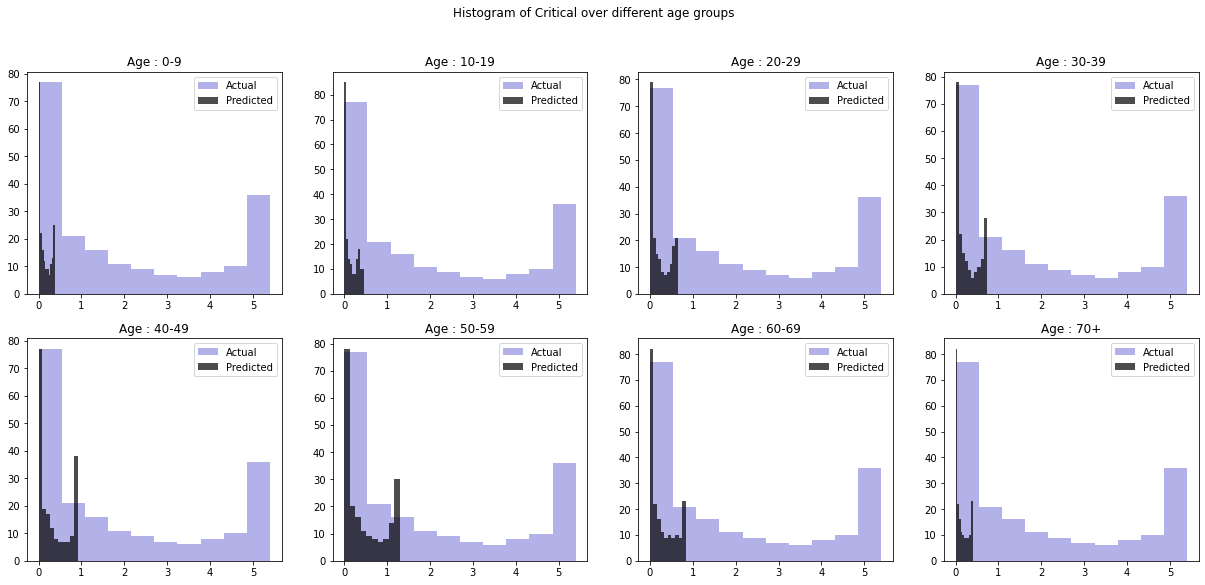

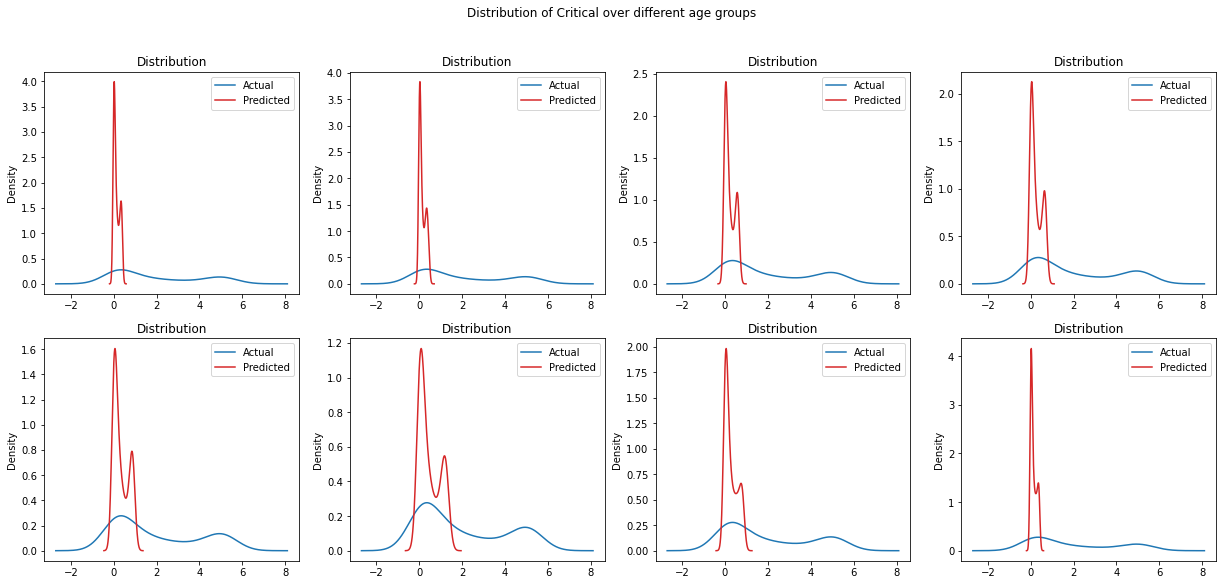

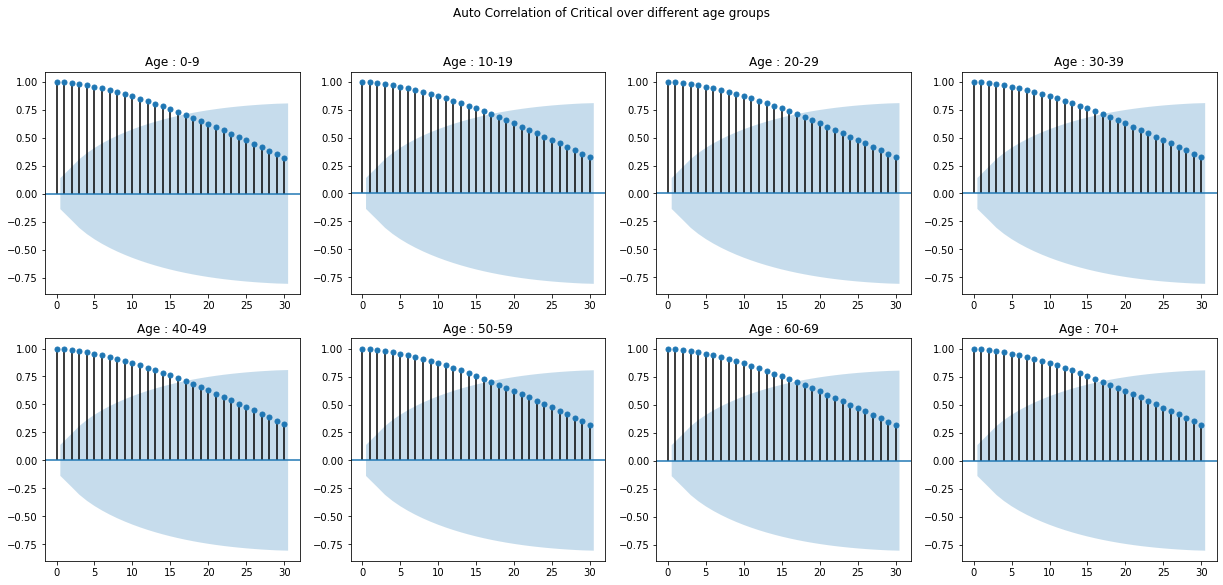

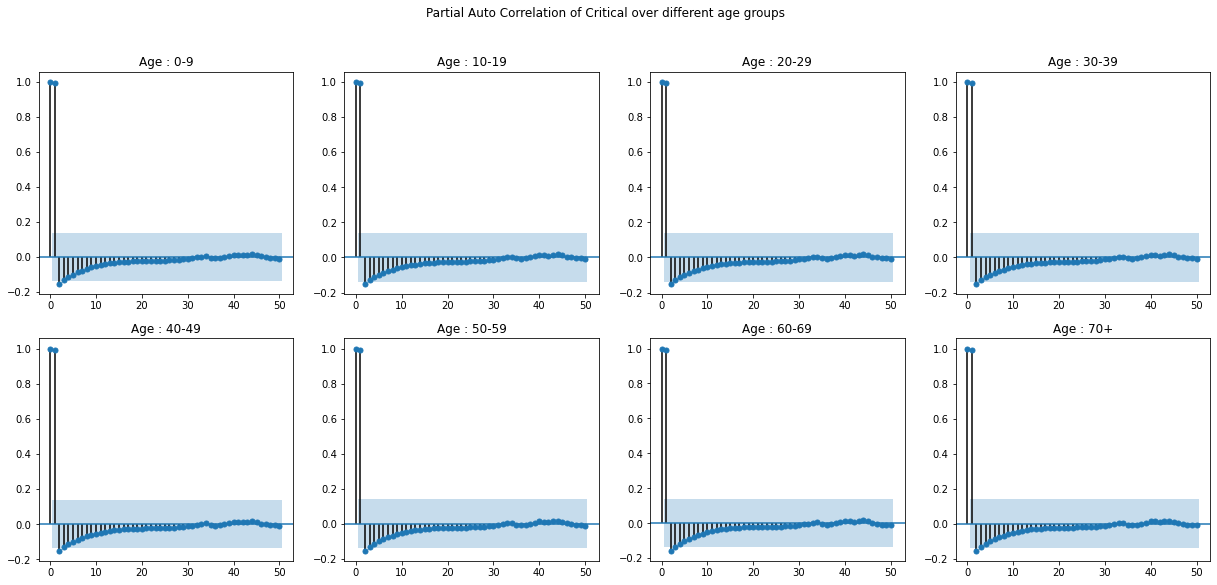

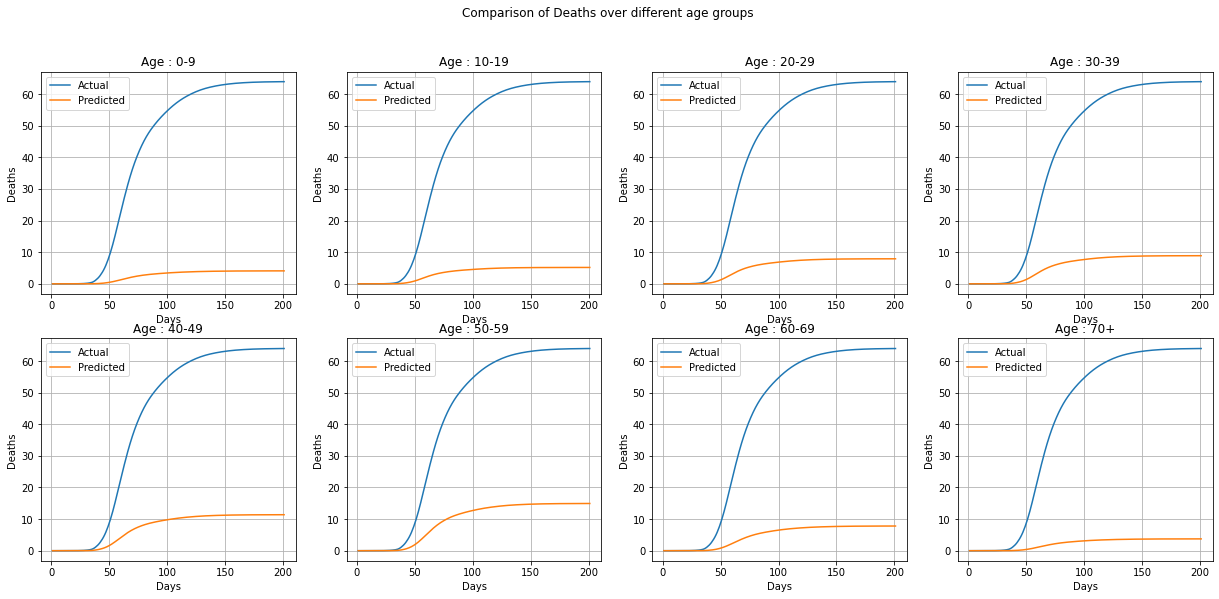

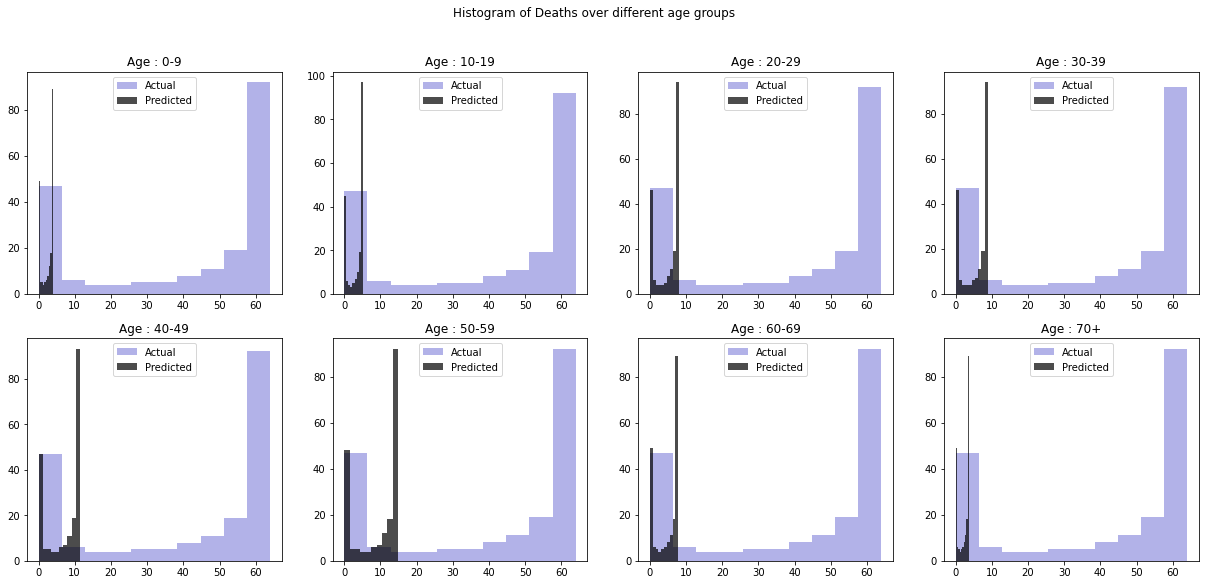

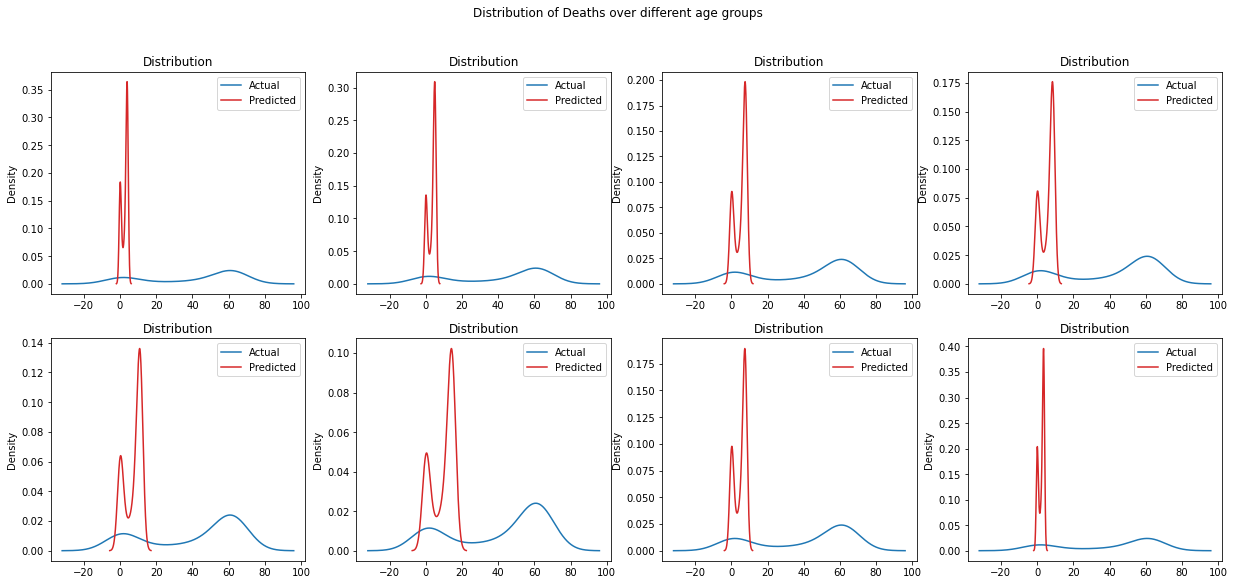

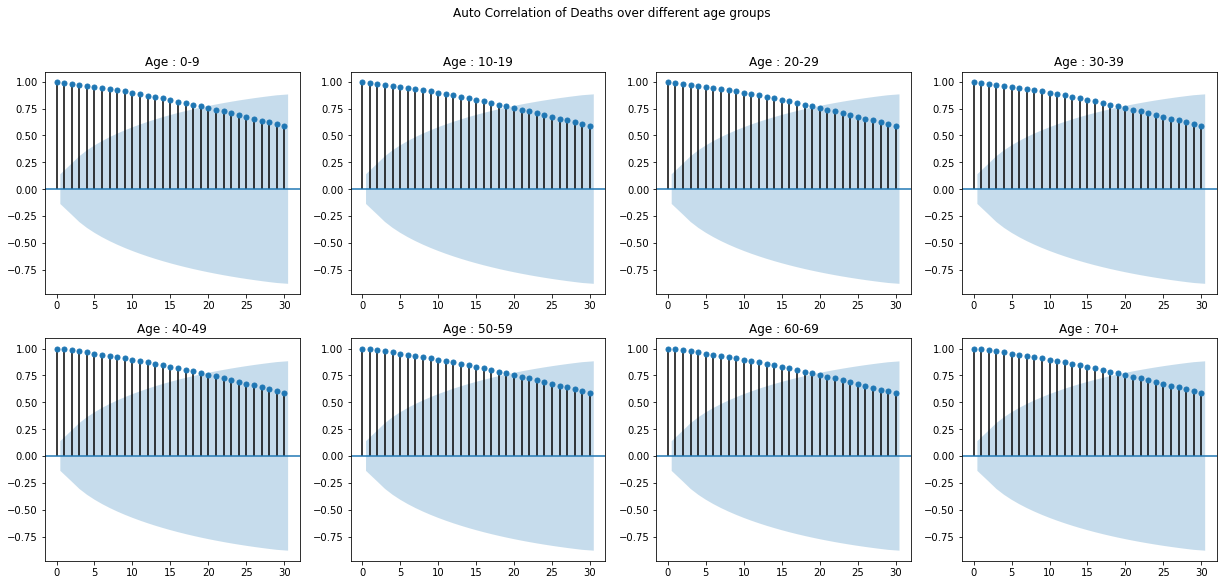

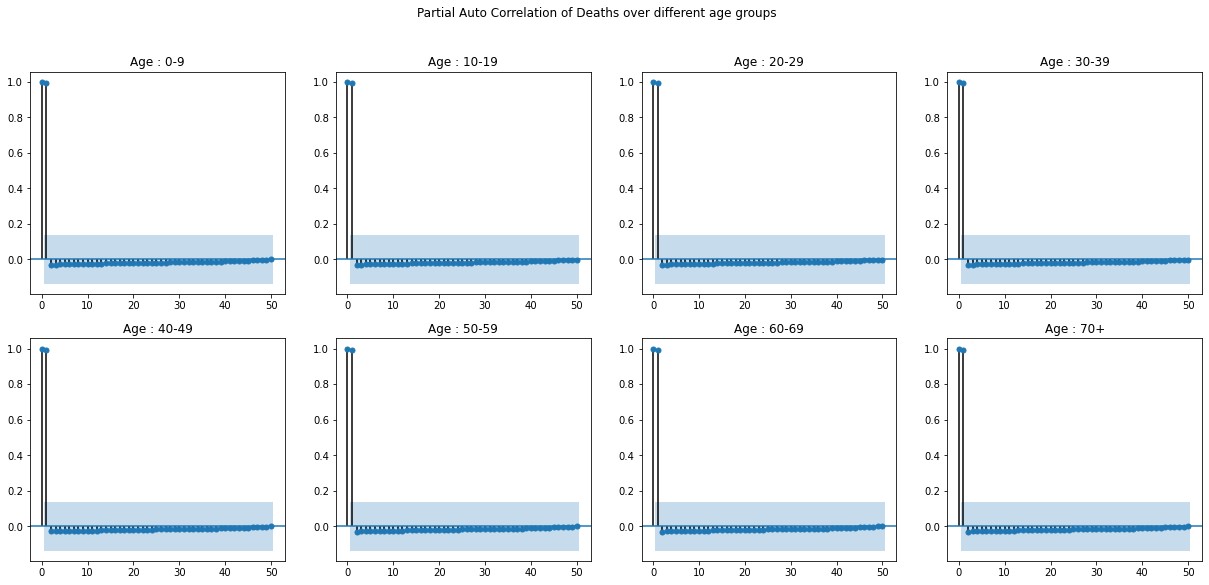

In [7]:
x = [i+1 for i in range(n_days)]

i = 0  # used for getting id of figures
fig = []
for col in case_cols:
    n1 = 1  # used for position of subplots
    # different types of figures eg:series, histogram, distribution, auto-correlation, partial auto-correlation
    n_figures = 5
    for f in range(n_figures):
        fig.append(plt.figure((n_figures*i)+f, figsize=(21, 9)))
    for age in age_categories:
        cols = [col + ": " + age, "Time"]
        df_age_simul = df_cm[cols]

        # Calculate averages for all simulations
        df_age_sum = df_age_simul.groupby(['Time']).sum() * population
        df_age = df_age_sum / n_simul

        col_age = col + ": " + age
        y = df_all[col]
        pred = df_age[col_age]

        # plotting the series
        fig[n_figures*i].suptitle('Comparison of ' + col + ' over different age groups')
        ax1 = fig[n_figures*i].add_subplot(Rows, Cols, n1)
        ax1.set_title("Age : " + age)
        ax1.grid(True)
        ax1.plot(x, y, label='Actual')
        ax1.plot(x, pred, label='Predicted')
        ax1.legend()
        ax1.set(xlabel='Days', ylabel=col)

        # plotting the histogram
        fig[n_figures*i + 1].suptitle('Histogram of ' + col + ' over different age groups')
        ax2 = fig[n_figures*i + 1].add_subplot(Rows, Cols, n1)
        ax2.set_title("Age : " + age)
        ax2.hist(y, ls='dashed', lw=3, fc=(0, 0, 0.7, 0.3), label='Actual')
        ax2.hist(pred, lw=3, fc=(0, 0, 0, 0.7),  label='Predicted')
        ax2.legend()

        # plotting the kde distribution
        fig[n_figures*i + 2].suptitle('Distribution of ' + col + ' over different age groups')
        ax3 = fig[n_figures*i + 2].add_subplot(Rows, Cols, n1)
        ax3.set_title("Age : " + age)
        y.plot(kind='kde', ax=ax3, title='Distribution', color='tab:blue', label='Actual')
        pred.plot(kind='kde', ax=ax3, title='Distribution', color='tab:red', label='Predicted')
        ax3.legend()

        # plotting the auto correlation
        fig[n_figures * i + 3].suptitle('Auto Correlation of ' + col + ' over different age groups')
        ax4 = fig[n_figures * i + 3].add_subplot(Rows, Cols, n1)
        plot_acf(y - pred, ax4, lags=30, title='Age : ' + age)

        # plotting the partial auto correlation
        fig[n_figures * i + 4].suptitle('Partial Auto Correlation of ' + col + ' over different age groups')
        ax5 = fig[n_figures * i + 4].add_subplot(Rows, Cols, n1)
        plot_pacf(y - pred, ax5, lags=50, method='ywm', title='Age : ' + age)

        print("col " + col + ' age ' + age)
        n1 = n1 + 1
    i = i + 1
# plt.subplots_adjust(wspace=1.0, hspace=1.0)
plt.show()